# Problem set0 for Computer Vision
## 1. Input images

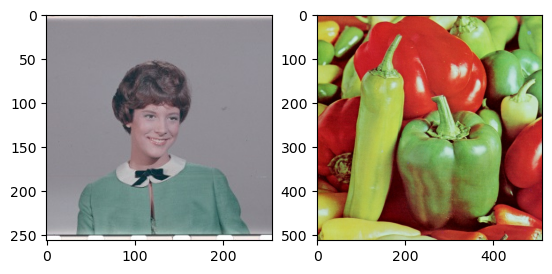

In [2]:
import cv2
import matplotlib.pyplot as plt
#read the pictures
img1, img2 = cv2.imread("./ps0-1-a-1.jpg"), cv2.imread("./ps0-1-a-2.jpg")
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
#show the pictures
plt.subplot(1,2,1)
plt.imshow(img1)
plt.subplot(1,2,2)
plt.imshow(img2)

## 2.Color planes
### a.Swap the red and blue pixels of image 1

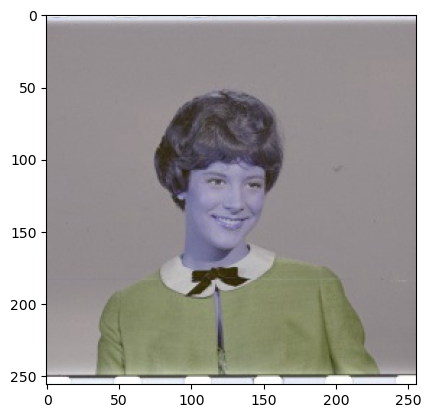

In [3]:
recolor_img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
cv2.imwrite("./ps0-2-a-recolor_img1.png",recolor_img1)
plt.imshow(recolor_img1)


### b.Create a monochrome image (M1g) by selecting the green channel of image 1

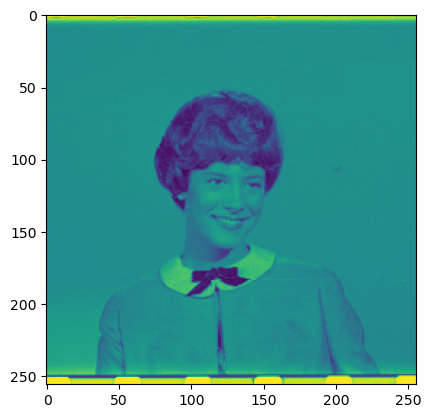

In [4]:
#split the picture in three channels
r1, g1, b1 = cv2.split(img1)
cv2.imwrite("./ps0-2-b-green_img1.jpg", g1)

plt.imshow(g1)

### c.Create a monochrome image (M1r) by selecting the red channel of image 1

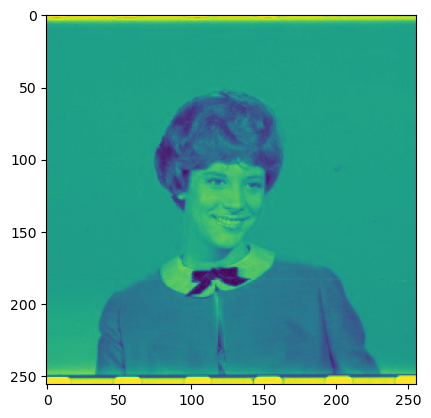

In [5]:
cv2.imwrite("./ps0-2-b-red_img1.jpg", r1)
plt.imshow(r1)

### d.Which looks more like what you’d expect a monochrome image to look like? Would you expect a computer vision algorithm to work on one better than the other?

The green M1g seems more like the one I'd expect, because it is closer to a picture that full of one sigle  color (it is green in this image).<br>
Yes, I expect that a computer vision algorithm to work on one M1g better than the others. For some images, for instance, if the green M1g has more clear edge than red one, then some edge detective algorithm would work better for the green M1g.

## 3. Replacement of pixels
### a.Take the inner square of 100x100 pixels of monochrome version of image 1 and insert them into the monochrome version of image 2

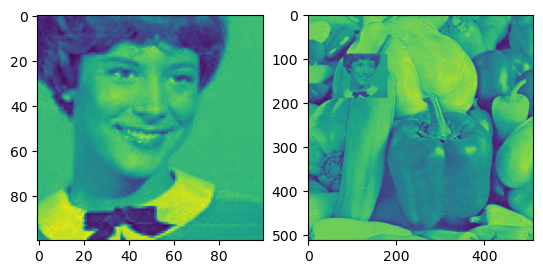

In [6]:
r2, g2, b2 = cv2.split(img2)

#select and save the inner 100*100 pixcels of M1b
img1_select = b1[90:190,80:180]
plt.subplot(1,2,1)
plt.imshow(img1_select)
r2[90:190, 80:180]=img1_select
plt.subplot(1,2,2)
plt.imshow(r2)



I choose the 100x100 pixels of blue monochrome version of image 1 to insert them into the red monochrome version of image 2

## 4.Arithmetic and Geometric operation
### a. What is the min and max of the pixel values of M1g? What is the mean? What is the standard deviation? And how did you compute these?

M1g is also known as the grey scale image, and the image can be represented by matrix, in which the values of elements indicate the darkness or lightness of the pixels in the image. <br>
In this way, the min and max pixel values of M1g refers to the minimum grayscale value of the M1g. In most cases, the pixel values are represented using 8 bits (0 - 255), that means the pixel values can range from 0 to 255.<br>
The mean of the pixel values of monochrome image represents the average brightness of M1g, and the standard deviation represents the spread of pixel values from the mean.<br>
My outline for compute these values:<br>
1.	Iterate through each pixel in M1g to find the min and max value.<br>
2.	Calculate the sum of pixel values and calculate the mean by apply: Mean = (Sum of all pixel values) / (Total number of pixels)<br>
3.	Iterate all pixels to calculate the squared differences between the pixel values and the mean, then calculate the average of the squared differences. Then the standard deviation can be calculated by applying: Standard Deviation = sqrt((1/N) * Σ(pixel value - mean)^2).<br>
In OpenCv of python, I can use function cv.minMaxLoc() to get the min and max pixel of image, and apply function cv.meanStadDev() to calculate the mean and standard deviation of image.


### b. Subtract the mean from all the pixels, then divide by the standard deviation, then multiply by 10 (if your image is zero to 255) or by 0.05 (if your image ranges from 0.0 to 1.0). Now add the mean back in.

#### I take the green M1g of Image1 for example, the output will be:

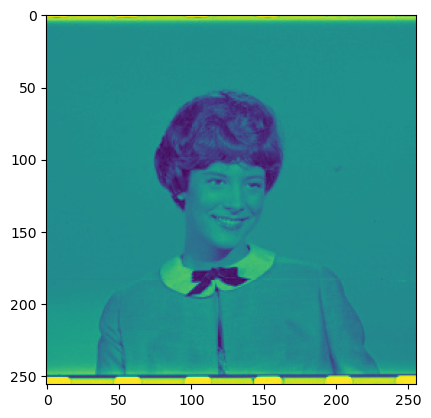

In [20]:
#calculate the mean and standard deviation of g1
mean , stddev = cv2.meanStdDev(g1)
#process the new image
image_new = (g1 - mean) / stddev * 10 + mean
plt.imshow(image_new)

### c. Shift M1g to the left by 2 pixels.

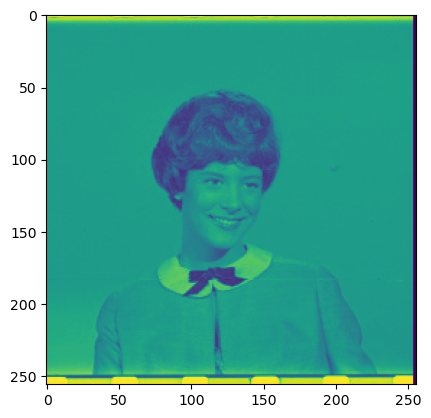

In [22]:
import numpy as np
image_shift = np.zeros_like(g1)
image_shift[:, :-2] = g1[:, 2:]
plt.imshow(image_shift)


### d.Subtract the shifted version of M1g from the original and make sure that the values are legal (what do negative numbers for pixels mean anyway?)

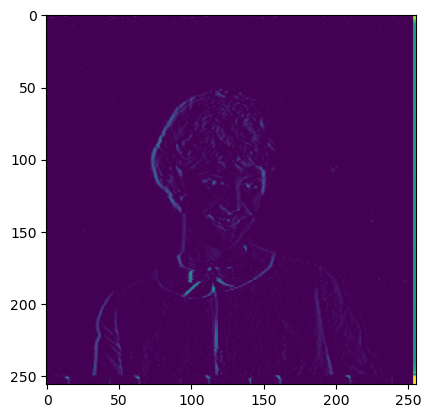

In [24]:
#subtract the shifted image from the original one
image_sub = g1.astype(int) - image_shift.astype(int)
#ensure the legal pixel values
image_sub = np.clip(image_sub, 0, 255).astype(np.uint8)
plt.imshow(image_sub)

When performing mathematical operations like subtraction, the result can be negative if the shifted image's pixel values are higher than the original image's pixel values. Besides, In the context of image interpretation, negative pixel values might not have a direct physical interpretation, but they could indicate regions where the shifted image is darker or less intense compared to the original image.

## 5. noise
### a. Take the original colored image and start adding Gaussian noise to the pixels in the green channel. Increase sigma until the noise is somewhat visible.

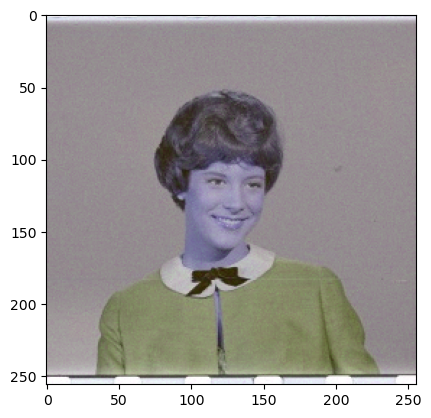

In [28]:
#produce gaussion noise and add to g1
sigma = 5
noise = np.random.normal(0, sigma, g1.shape)
g1_noise = g1 + noise
g1_noise = np.clip(g1_noise, 0, 255).astype(np.uint8)
#creat the new image with noise and show
image_noise_g = cv2.merge([b1, g1_noise, r1])
plt.imshow(image_noise_g)


Gaussian noise a type of noise that follows the Gaussian distribution, thus, “sigma”represents the standard deviation of the distribution, which is used to generate the noise. A larger sigma means a larger standard deviation, which would bing a wider distribution, and make the noise more visible.

### b. Now, instead add that amount of noise to the blue channel

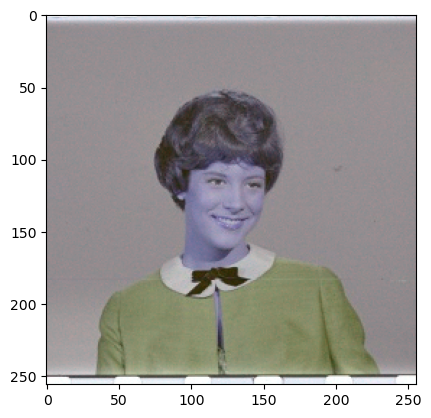

In [29]:
sigma = 5
noise = np.random.normal(0, sigma, b1.shape)
b1_noise = b1 + noise
b1_noise = np.clip(b1_noise, 0, 255).astype(np.uint8)
#creat the new image with noise and show
image_noise_b = cv2.merge([b1_noise, g1, r1])
plt.imshow(image_noise_b)

### c. Which looks better? Why?

I think the new image with noise added in blue channel looks better. Even though both new images were added by Gaussian noise with the same sigma, the noise in latter image looks less visible.<br>
I turn to Internet to find some answers to the interesting phenomenon, and I find a reasonable explanation. It says that human vision works in a special way that our eyes are more sensitives to the changes in brightness than to the changes in color of an image. While we add Gaussian noise to the green channel, the brightness of image would be affected, and the noise in blue channel would have an influence in color changes of the image. Thus, human visual system’s sensitivity to changes in brightness and color leads to the difference human eyes’ response to the noise added in green channel and blue channel.
